In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
#清洗数据
data=data.dropna(subset=['satisfaction_level','last_evaluation'])
data=data[data['satisfaction_level']<=1][data['salary']!='nme']

In [5]:
data[~data['salary'].isin(['low','medium','high'])]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


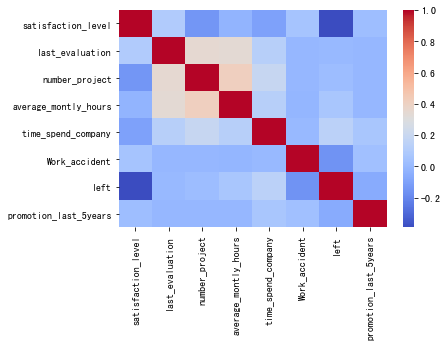

In [6]:
sns.heatmap(data.corr(method='pearson'),cmap='coolwarm')

In [7]:
#得到标注
label=data['left']
data=data.drop('left',axis=1) 

In [8]:
label

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [9]:
def map_salary(s):
    high_low_dict={'low':0,'medium':1,'high':2}
    return high_low_dict.get(s,0)


def preprocessing(p1,p2,p3,p5,p6,p7,p8,p9,lower_d=False,ld_n=1,data=data,label=label):
    label=np.array(label).reshape(-1,1)
    scaler_lst=[p1,p2,p3,p5,p6,p7]
    scaler_lst1=[p8,p9]
    column_list=['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years']
    column_list1=['sales','salary']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            data[column_list[i]]=MinMaxScaler().fit_transform(np.array(data[column_list[i]]).reshape(-1,1))
        else:
            data[column_list[i]]=StandardScaler().fit_transform(np.array(data[column_list[i]]).reshape(-1,1))
            
    for j in range(len(scaler_lst1)):
        if not scaler_lst1[j]:
            if column_list1[j]=='salary':
                data['salary']=data['salary'].map(lambda x:map_salary(x))
            else:
                data[column_list1[j]]=LabelEncoder().fit_transform(data[column_list1[j]])
        else:
            #data[column_list1[j]]=OneHotEncoder().fit_transform(np.array(column_list1[j]).reshape(-1,1))
            data=pd.get_dummies(data,columns=[column_list1[j]])
    
    if lower_d:
        return PCA(n_components=ld_n).fit_transform(data),label
    
    return data,label

In [10]:
data1=data.copy()
data3=preprocessing(False,False,False,False,False,False,True,True,lower_d=True,ld_n=3,data=data1,label=label)
data4=preprocessing(False,False,False,False,False,False,False,False,lower_d=True,ld_n=3,data=data1,label=label)
print(data3[0].shape,data3[1].shape)

(14999, 3) (14999, 1)


In [11]:
#训练集、验证集、测试集拆分
from sklearn.model_selection import train_test_split

def data_modeling(features,label):
    f_v=features
    l_v=label
    X_test,X_validation,Y_test,Y_validation=train_test_split(f_v,l_v,test_size=0.2)
    X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.25)
    # print(len(X_train),len(X_validation),len(X_test))
    return X_train,Y_train,X_test,Y_test,X_validation,Y_validation


#data_modeling(data3[0],data3[1])

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AUC 0.8785243834849699
ROC 0.8785243834849699
AUC 0.7572862691315833
ROC 0.7572862691315833
AUC 0.7440610925618265
ROC 0.7440610925618265


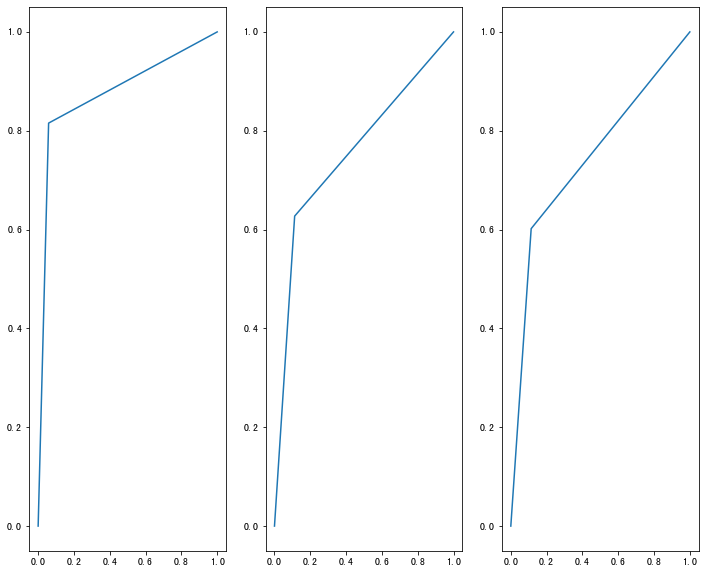

In [23]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from sklearn.externals.six import StringIO
import pydotplus

X_train,Y_train,X_test,Y_test,X_validation,Y_validation=data_modeling(data4[0],data4[1])
# knn_clf=KNeighborsClassifier(n_neighbors=3,n_jobs=10)
# knn_clf.fit(X_train,Y_train)
# Y_pred=knn_clf.predict(X_validation)
# print('ACC_val:',accuracy_score(Y_validation,Y_pred))
# print('REC_val:',recall_score(Y_validation,Y_pred))
# print('F-score_val:',f1_score(Y_validation,Y_pred))
# print('ACC_test:',accuracy_score(Y_test,Y_pred))
# print('REC_test:',recall_score(Y_test,Y_pred))
# print('F-score_test:',f1_score(Y_test,Y_pred))

# mdl=Sequential()
# mdl.add(Dense(50,input_dim=len(data4[0])))
# mdl.add(Activationtivation('sigmoid'))
# mdl.add(Dense(2))
# mdl.add(Activation('softmax'))
# sgd=SGD(lr=0.01)
# mdl.compile(loss='mean_squared_error',optimizer='adam')
# mdl.fit(X_train,np.array([[0,1] if i==1 else [1,0] for i in Y_train]),nb_epoch=1000,batch_size=2000)


models=list()

models.append(('KNN',KNeighborsClassifier(n_neighbors=3,n_jobs=10)))
# models.append(('GaussianNB',GaussianNB()))
# models.append(('BernoulliNB',BernoulliNB()))
# models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
# models.append(('SVM classifier',SVC(C=10000)))
# models.append(('RandomForestClassifier',RandomForestClassifier(max_features=None)))
# models.append(('AdaBoostClassifier',AdaBoostClassifier(base_estimator=SVC(),algorithm='SAMME')))
#models.append(('LogisticRegression',LogisticRegression(solver='newton-cg')))

from sklearn.metrics import roc_auc_score,roc_curve,auc
figure=plt.figure(figsize=(12,10))
for clf_name,clf in models:
    clf.fit(X_train,Y_train)
    xt_lst=[(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)]
    for i in range(len(xt_lst)):
        X_part=xt_lst[i][0]
        Y_part=xt_lst[i][1]
        Y_pred=clf.predict(X_part)
        
        figure.add_subplot(1,3,i+1)
        fpr,tpr,threshold=roc_curve(Y_part,Y_pred)
        plt.plot(fpr,tpr)
        print('AUC',auc(fpr,tpr))
        print('ROC',roc_auc_score(Y_part,Y_pred))
#         print(clf_name,'ACC',accuracy_score(Y_part,Y_pred))
#         print(clf_name,'REC',recall_score(Y_part,Y_pred))
#         print(clf_name,'f1_score',f1_score(Y_part,Y_pred))
        
#         dot_data=export_graphviz(clf,out_file=None,class_names=['NL','L'],filled=True,rounded=True,special_characters=True)
#         graph=pydotplus.graph_from_dot_data(dot_data)
#         graph.write_pdf('decesion_tree.pdf')

IndexError: too many indices for array

In [ ]:
from sklearn.externals import joblib
joblib.dump(knn_clf,'knn_clf')

In [ ]:
result=OneHotEncoder().fit_transform(np.array(data.salary).reshape(-1,1))
result

In [ ]:
features=data.copy()
features.columns

In [ ]:
features[['number_project','average_montly_hours']].values
features['last_evaluation'].values

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
def regression(features,label):
    #regr=LinearRegression()
    #regr=Ridge(alpha=0.01)
    #regr=Lasso(alpha=10)
    regr.fit(features,label)
    Y_pred=regr.predict(features)
    print('coef:',regr.coef_)
    print('intercept:',regr.intercept_)
    print('r2:',r2_score(label,Y_pred))
   
X=features[['number_project','average_montly_hours']].values
Y=features['last_evaluation'].values
regression(X,Y)